<a href="https://colab.research.google.com/github/Deepak141/Internship/blob/master/Recomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 1.6MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.8-cp36-none-any.whl size=73275 sha256=dfc92ef519d60373cafdb7468e1703cd81a7a3de35707dc9e12f750f677995f1
  Stored in directory: /root/.cache/pip/wheels/94/a7/09/68dc83c7c14fdbdf5d3f2b2da5b87e587bfc1e85df69b1130c
Successfully built kaggle
  Found existing installation: kaggle 1.5.8
    Uninstalling kaggle-1.5.8:
      Successfully uninstalled kaggle-1.5.8


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dafrel","key":"fe8efba2f9884818bb24c6c528cac916"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d grouplens/movielens-20m-dataset

 99% 193M/195M [00:01<00:00, 101MB/s] 
100% 195M/195M [00:01<00:00, 126MB/s]


In [ ]:
!unzip -uq "/content/movielens-20m-dataset.zip" -d "/content/proj"

##Recommendation system

Importing the Libraries

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt



Reading Csv file from the available dataset

In [ ]:
movie=pd.read_csv("/content/proj/movie.csv")
rating=pd.read_csv("/content/proj/rating.csv")


##Exploratory Data Analysis

In [ ]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


Distribution of the ratings


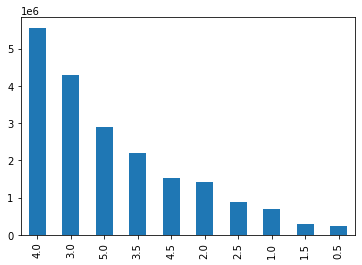

In [ ]:
rating['rating'].value_counts().plot(kind='bar')

Top 10 genres distribution 

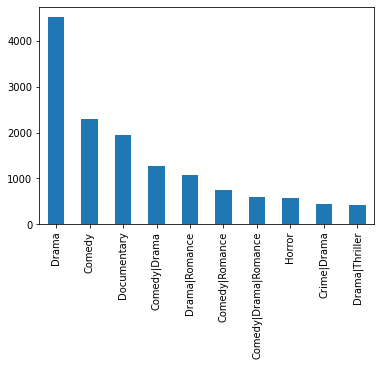

In [ ]:
movie['genres'].value_counts()[:10].plot(kind='bar')

Top 10 highest movieId that have been reviewed

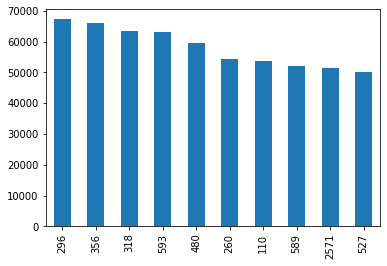

In [ ]:
rating['movieId'].value_counts()[:10].plot(kind='bar')

In [ ]:
unique_movies=movie['movieId'].nunique()
print(f'number of unique movies :  {unique_movies}')

number of unique movies :  27278


In [ ]:
unique_movies_rated=rating['movieId'].nunique()
print(f'number of unique movies that are rated :  {unique_movies_rated}')

number of unique movies that are rated :  26744


Checking the missing values

In [ ]:
rating.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
movie.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

Removing Unwanted column

In [ ]:
rating.drop(columns='timestamp',axis=1,inplace=True)

In [ ]:
movies=movie.merge(rating,on='movieId')

Selecting the users who have rated more than 50 movies 

In [ ]:
num_user=rating.groupby('userId')['rating'].count().reset_index()
num_users=num_user[num_user['rating']>50]
num_users.head()

,userId,rating
0,1,175
1,2,61
2,3,187
4,5,66
6,7,276


Selecting movie ID which have a total rating above 500

In [ ]:
num_movies=rating.groupby('movieId')['rating'].count().reset_index()
num_movie=num_movies[num_movies['rating']>500]
num_movie

,movieId,rating
0,1,49695
1,2,22243
2,3,12735
3,4,2756
4,5,12161
...,...,...
23574,112852,2049
24194,115569,609
24453,116797,759
24462,116823,567


In [ ]:
movie_above_th=num_movie.merge(movies,on='movieId')
movie_above_th.drop(columns=['rating_x','genres'],inplace=True)
movie_above_th.head()

,movieId,title,userId,rating_y
0,1,Toy Story (1995),3,4.0
1,1,Toy Story (1995),6,5.0
2,1,Toy Story (1995),8,4.0
3,1,Toy Story (1995),10,4.0
4,1,Toy Story (1995),11,4.5


In [ ]:
final_movie=movie_above_th.merge(num_users,on='userId')
final_movie.drop(columns=['rating'],inplace=True)
final_movie.head()

,movieId,title,userId,rating_y
0,1,Toy Story (1995),3,4.0
1,24,Powder (1995),3,3.0
2,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),3,4.0
3,50,"Usual Suspects, The (1995)",3,5.0
4,160,Congo (1995),3,3.0


In [ ]:
piv_tab=final_movie.pivot_table(values='rating_y',index='userId',columns='title')
rec=piv_tab.fillna(0)
rec.head()

title,'Til There Was You (1997),"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),11:14 (2003),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),13 Ghosts (1960),13 Going on 30 (2004),"13th Warrior, The (1999)",1408 (2007),15 Minutes (2001),16 Blocks (2006),17 Again (2009),187 (One Eight Seven) (1997),1941 (1979),1984 (Nineteen Eighty-Four) (1984),2 Days in Paris (2007),2 Days in the Valley (1996),"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",20 Dates (1998),"20,000 Leagues Under the Sea (1954)",200 Cigarettes (1999),2001: A Space Odyssey (1968),2010: The Year We Make Contact (1984),2012 (2009),2046 (2004),21 (2008),21 Grams (2003),21 Jump Street (2012),22 Jump Street (2014),24 Hour Party People (2002),...,X-Men: First Class (2011),X-Men: The Last Stand (2006),X2: X-Men United (2003),"Yards, The (2000)",Year One (2009),"Year of Living Dangerously, The (1982)",Yellow Submarine (1968),Yentl (1983),Yes Man (2008),Yi Yi (2000),Yojimbo (1961),You Can Count on Me (2000),You Can't Take It with You (1938),You Don't Mess with the Zohan (2008),You Only Live Twice (1967),You've Got Mail (1998),"You, Me and Dupree (2006)",Young Einstein (1988),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Your Friends and Neighbors (1998),Youth in Revolt (2009),Z (1969),Zack and Miri Make a Porno (2008),Zathura (2005),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zulu (1964),[REC] (2007),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
def recommend(name):
  movie_name=piv_tab[name]
  sim_movie=piv_tab.corrwith(movie_name)
  sim_movie=sim_movie.sort_values(ascending=False)
  print(sim_movie.head(11))

In [ ]:
recommend("Toy Story (1995)")

title
Toy Story (1995)                                          1.000000
Toy Story 2 (1999)                                        0.740575
Toy Story 3 (2010)                                        0.583738
Bug's Life, A (1998)                                      0.531396
Monsters, Inc. (2001)                                     0.519827
Finding Nemo (2003)                                       0.502987
Incredibles, The (2004)                                   0.439848
Aladdin (1992)                                            0.439244
Lion King, The (1994)                                     0.422443
101 Dalmatians (One Hundred and One Dalmatians) (1961)    0.418941
Beauty and the Beast (1991)                               0.416379
dtype: float64


In [ ]:
recommend("101 Dalmatians (1996)")

title
101 Dalmatians (1996)                                     1.000000
102 Dalmatians (2000)                                     0.759862
Flipper (1996)                                            0.612745
Stuart Little 2 (2002)                                    0.600575
My Girl 2 (1994)                                          0.598662
Madeline (1998)                                           0.594516
101 Dalmatians (One Hundred and One Dalmatians) (1961)    0.592332
All Dogs Go to Heaven 2 (1996)                            0.589619
Homeward Bound II: Lost in San Francisco (1996)           0.586411
It Takes Two (1995)                                       0.582708
Rugrats in Paris: The Movie (2000)                        0.582644
dtype: float64
